In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import scipy as sc

**PARTE #1**

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

In [2]:
T = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
I = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

In [3]:
di_dt = np.diff(I) / np.diff(T)
II = (I[0:4] + I[1:5]) / 2
TT = (T[0:4] + T[1:5]) / 2

L,R = 0.142, 0.98
fem = L*di_dt[0:5] + R*II[0:5]

dicc = {"TiempoPromedio" : TT, "AmperiosPromedio" : II, "Derivadas" : di_dt, "FEM" : fem}

df = pd.DataFrame(dicc)
df

,TiempoPromedio,AmperiosPromedio,Derivadas,FEM
0,1.005,3.11,2.0,3.3318
1,1.015,3.13,2.0,3.3514
2,1.025,3.16,4.0,3.6648
3,1.035,3.21,6.0,3.9978


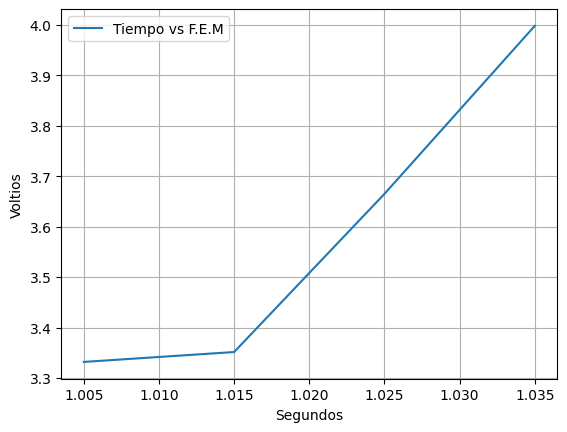

In [4]:
plt.plot(df.TiempoPromedio,df.FEM, label = 'Tiempo vs F.E.M')
plt.xlabel('Segundos')
plt.ylabel('Voltios')
plt.legend()
plt.grid()
plt.show()

**PARTE #2**

*1)-4)*

$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

In [5]:
f = lambda x: 1 / ( np.sqrt(np.tan(x)) )

In [6]:
Xf = np.linspace(0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001, 
np.pi/2.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001, 100000)
Yf = f(Xf)

In [7]:
sc.integrate.trapz(Yf,Xf)

2.483671903168057e+102

In [8]:
sc.integrate.simpson(Yf,Xf)

1.6557812687787046e+102

In [9]:
sc.integrate.quad(f,0,np.pi/2)

(2.2214414690792026, 4.1406478246130973e-10)

$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

In [10]:
g = lambda x : 1 / ( 1 + (x**2) )

In [18]:
Xg = np.linspace(-100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
,100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,100000)
Yg = g(Xg)

In [19]:
sc.integrate.trapz(Yg,Xg)

4.934732852528612e-147

In [20]:
sc.integrate.simpson(Yg,Xg)

-inf

In [14]:
sc.integrate.quad(g,-np.inf,np.inf)

(3.141592653589793, 5.155583041103855e-10)

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

In [15]:
h = lambda y,x: 2*y*np.sin(x) + (np.cos(x))**2

In [16]:
Xh = np.linspace(0, np.pi/4, 1000)

a, b = lambda x: np.sin(x), lambda x: np.cos(x)

Xh_a, Xh_b = a(Xh), b(Xh)

M = np.arange(0,len(Xh),1)
Z = np.zeros(len(Xh))

for m in M:
  Z[m] = sc.integrate.quad(h,Xh_a[m],Xh_b[m], args = (Xh[m]))[0]

sc.integrate.trapezoid(Z,Xh)

0.5118445260477336

*5)*

$$
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
$$

In [21]:
pp0 = lambda m, g, b, I0: 2*np.pi * ( ( I0 / m*g*b ) )

$$
k = sin \frac{\theta_0}{2}
$$

In [22]:
kk = lambda theta_0: np.sin(theta_0 / 2)

$$
p = \frac{1}{\sqrt{1-k^2\sin^2\phi}}
$$

In [23]:
pp = lambda k, phi: 1 / ( ( 1 - ( (k**2)*((np.sin(phi))**2) ) ) )

$$
P =  \frac{2P_0}{\pi} \int _0^{\pi/2} p = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
$$

In [37]:
m, g, b, I0, theta_0 = 1, 9.8, 0.23, 3, np.pi/3

k, p0 = kk(theta_0), pp0(m, g, b, I0)
p = sc.integrate.quad(pp,0,np.pi/2, args = (k))[0]

P = ( ( 2*p0 ) / np.pi ) * p

print('El periodo P para los parametros iniciales m, g, b, I0, theta_0 = '+str(m)+', '+str(g)+', '+str(b)+', '+str(I0)+', '+str(theta_0)+', '+' es: '+str(P))

El periodo P para los parametros iniciales m, g, b, I0, theta_0 = 1, 9.8, 0.23, 3, 1.0471975511965976,  es: 55.29099051054306
